# Current climate plus future projection anomalies
**Is there a way to use the 4pp plot with the average conditions for GWL1.2 and the change % for GWL1.5 to GWL3? Or does it only work for plots that use a consistent colourbar?**

`plot_acs_hazard_4pp` assumes a shared colorbar and scale for all maps.

`plot_acs_hazard_1plus3` also has four panel, but the first has a separate colorbar and scale, while the last three figures share a different colorbar and scale.


In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 14.1 s, sys: 1.6 s, total: 15.7 s
Wall time: 19.1 s


CPU times: user 32.4 s, sys: 1.75 s, total: 34.2 s
Wall time: 38.6 s


(<Figure size 800x300 with 6 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

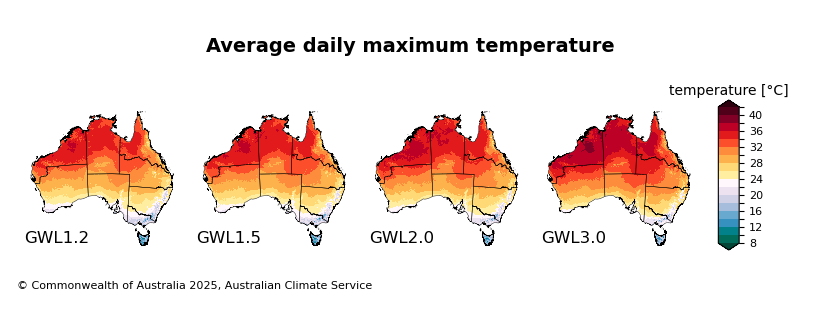

In [3]:
%%time 

var = "TXm"

# "current" with absolute values
ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
# "future" with absolute values
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                       ds_gwl15=ds_gwl15[var],
                       ds_gwl20=ds_gwl20[var],
                       ds_gwl30=ds_gwl30[var],
                       regions = regions,
                       title = "Average daily maximum temperature",
                       cmap = cmap_dict["tasmax"],
                       ticks = np.arange(8,43,2),
                       tick_interval=2,
                       cbar_label = "temperature [\N{DEGREE SIGN}C]",
                       watermark="",
                       orientation="horizontal",
                       issued_date="",
                       outfile = "figures/FAQ_example_4pp.png",
                       )

CPU times: user 5.82 s, sys: 63.7 ms, total: 5.89 s
Wall time: 6.21 s


(<Figure size 1000x300 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

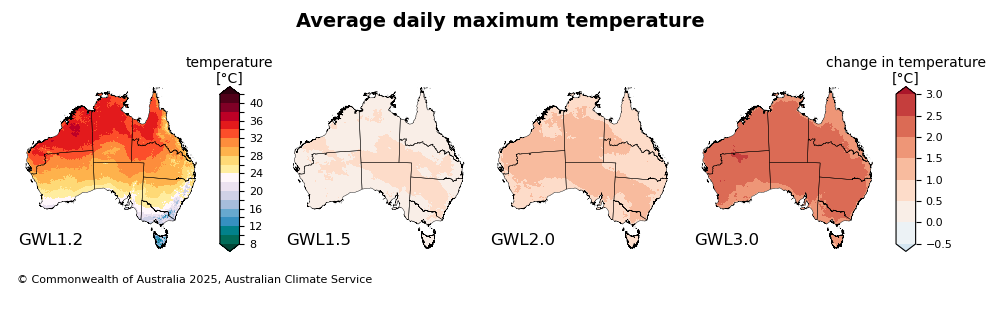

In [4]:
%%time 

var = "TXm"

# "current" with absolute values
ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
# "future" with anomalies/change values
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict["tasmax"],
                       gwl12_cbar_extend= "both",
                       gwl12_cbar_label= "temperature\n[\N{DEGREE SIGN}C]",
                       gwl12_ticks= np.arange(8,43,2),
                       gwl12_tick_interval=2,
                       ds_gwl15=ds_gwl15[var],
                       ds_gwl20=ds_gwl20[var],
                       ds_gwl30=ds_gwl30[var],
                       regions = regions,
                       title = "Average daily maximum temperature",
                       cmap = cmap_dict["tas_anom"],
                       ticks = np.arange(-0.5, 3.1, 0.5),
                       cbar_label = "change in temperature [\N{DEGREE SIGN}C]",
                       watermark="",
                       orientation="horizontal",
                       issued_date="",
                       vcentre=0,
                       outfile = "figures/FAQ_example_1plus3.png",
                       )